# Demonstrate how to use intepolated
Utilize a scipy.stats.rayleigh distribution to demonstrate

In [1]:
import pymc3 as pm
import seaborn as sns
import scipy
import scipy.stats
import numpy as np
import spacepy.toolbox as tb
import matplotlib.pyplot as plt
from theano import theano, tensor as tt

sns.set(font_scale=1.5)

## Now can we do this from a histogram?

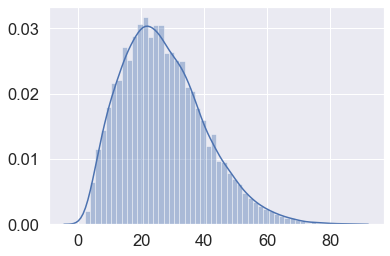

In [2]:
dist = scipy.stats.rayleigh(loc=2, scale=20)
rvs = dist.rvs(10000)
sns.distplot(rvs)

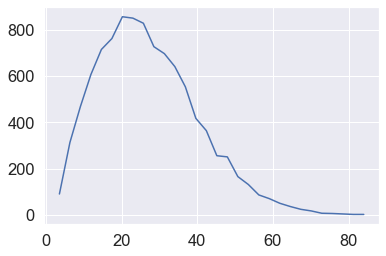

In [3]:
# need to make a callable function of the histogram of this. 
h, b = np.histogram(rvs, 30)
b = tb.bin_edges_to_center(b)
plt.plot(b, h)

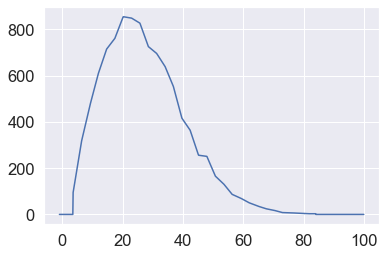

In [4]:
f = scipy.interpolate.interp1d(b,h, bounds_error=False, fill_value=0)
XX = np.linspace(-1, 100, 1000)
plt.plot(XX, f(XX))


In [28]:
with pm.Model() as model:
    pm.Interpolated('hist', b, h)
    pm.Interpolated('interp1d', XX, f(XX))
    trace = pm.sample(10000, target_accept=0.90)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [interp1d, hist]
Sampling 2 chains, 293 divergences: 100%|██████████| 21000/21000 [00:23<00:00, 894.87draws/s] 
There were 165 divergences after tuning. Increase `target_accept` or reparameterize.
There were 128 divergences after tuning. Increase `target_accept` or reparameterize.


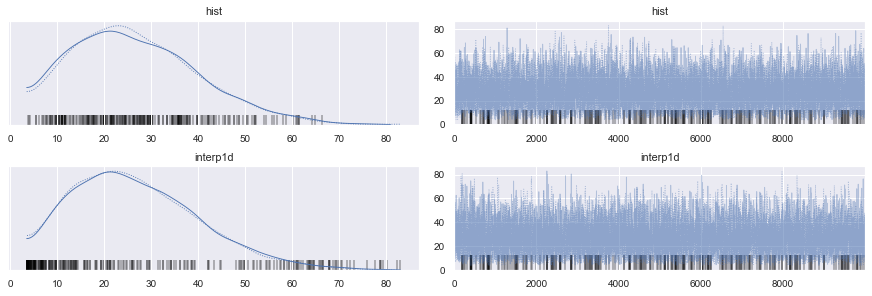

In [29]:
pm.traceplot(trace);

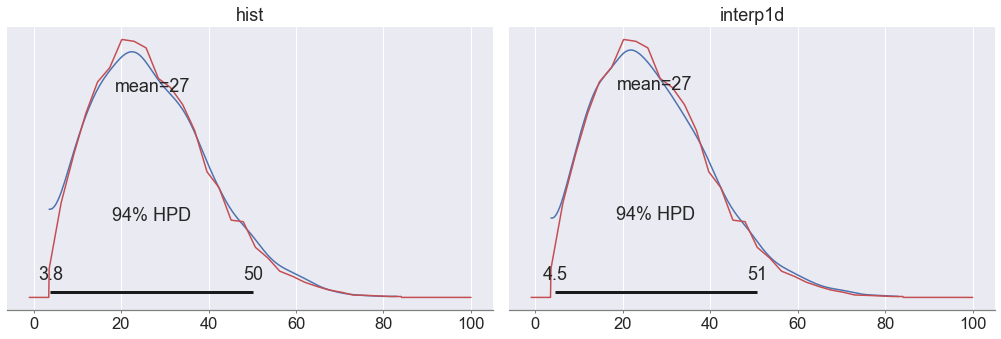

In [30]:
ax = pm.plot_posterior(trace);
ylim0 = ax[0].get_ylim()
ax[0].plot(XX, f(XX)/f(XX).max()*ylim0[1], c='r')
ax[1].plot(XX, f(XX)/f(XX).max()*ylim0[1], c='r');


## another example

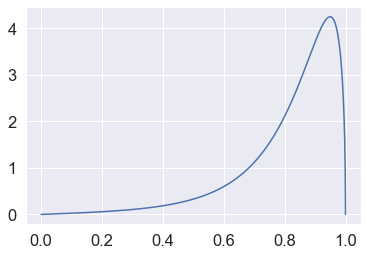

In [35]:
argus = scipy.stats.argus(3)
XX = np.linspace(0, 1, 1000)
YY = argus.pdf(XX)
plt.plot(XX, YY)

In [36]:
with pm.Model() as model:
    pm.Interpolated('argus', XX, YY)
    trace = pm.sample(10000, target_accept=0.90)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [argus]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:09<00:00, 2278.36draws/s]


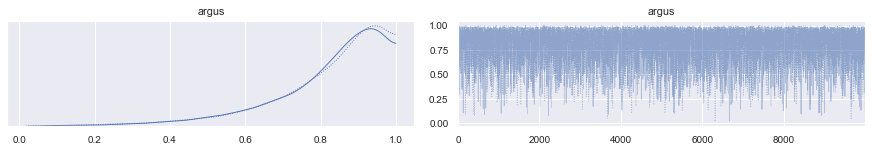

In [37]:
pm.traceplot(trace);

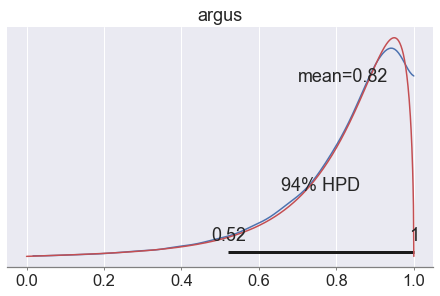

In [38]:
ax = pm.plot_posterior(trace);
ylim0 = ax[0].get_ylim()
ax[0].plot(XX, YY/YY.max()*ylim0[1], c='r')
